MODEL BUILDIN ISMINDA :ols ,HEATMAP,KOREALSYON KULLAN, SADECE XGBOOST KULLANMA DİĞERLERİNDEN BİR KAÇ TANE DAHA KULAN HATTA YENİ ÖĞRENDİĞİN KÜTÜPHANEYİ KULLAN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Model Building Data Cleaning.csv")
data=data.drop("Unnamed: 0",axis=1)
data.shape

(15926, 21)

In [3]:
data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,...,Exited,Retirement,EstimatedSalary / Age,CreditScore / Age,NumOfProducts / Tenure,EstimatedSalary / CreditScore,EstimatedSalary / Balance,EstimatedSalary / Tenure,EstimatedSalary / NumOfProducts,CreditScore / Tenure
CreditScore,1.000000,-0.014556,0.009920,0.009581,0.000928,-0.002495,0.005711,-0.024576,-0.000631,0.009314,...,-0.024149,0.011475,-0.013414,0.467110,0.006405,-0.263821,-0.017262,-0.009174,-0.025260,0.172822
Age,-0.014556,1.000000,-0.020902,0.043453,-0.040541,0.031449,-0.031577,-0.002602,0.079565,-0.059254,...,0.387544,0.338194,-0.356309,-0.782740,-0.023982,0.005058,-0.051085,-0.014312,0.022954,-0.008314
Tenure,0.009920,-0.020902,1.000000,0.009248,0.013058,0.022389,-0.020693,0.026225,0.009298,0.006510,...,-0.010953,0.005378,0.026459,0.020770,-0.676613,0.022785,-0.006593,-0.565876,0.012432,-0.769650
Balance,0.009581,0.043453,0.009248,1.000000,-0.204400,0.020096,-0.050725,0.007619,0.429590,-0.170326,...,0.149440,-0.016145,-0.012090,-0.033121,-0.102593,0.002731,-0.747734,-0.004442,0.122454,-0.006616
NumOfProducts,0.000928,-0.040541,0.013058,-0.204400,1.000000,-0.004857,0.032327,0.022267,-0.027460,0.014458,...,-0.055698,-0.003078,0.029612,0.030683,0.425703,0.019295,0.184069,-0.006326,-0.449874,-0.021194
HasCrCard,-0.002495,0.031449,0.022389,0.020096,-0.004857,1.000000,-0.044868,-0.022429,0.056333,-0.035963,...,0.108140,-0.013565,-0.032965,-0.028878,-0.041440,-0.019971,-0.022030,-0.044602,-0.018383,-0.041410
IsActiveMember,0.005711,-0.031577,-0.020693,-0.050725,0.032327,-0.044868,1.000000,-0.019052,-0.042159,0.055949,...,-0.283960,0.109457,0.006466,0.050193,0.047196,-0.021323,0.031769,0.029637,-0.040727,0.041455
EstimatedSalary,-0.024576,-0.002602,0.026225,0.007619,0.022267,-0.022429,-0.019052,1.000000,-0.021274,-0.007299,...,0.013654,0.002006,0.890180,-0.013179,-0.005942,0.954682,0.317155,0.537697,0.827567,-0.021422
Geography_Germany,-0.000631,0.079565,0.009298,0.429590,-0.027460,0.056333,-0.042159,-0.021274,1.000000,-0.331895,...,0.228782,-0.004866,-0.050304,-0.068700,-0.024582,-0.021997,-0.384047,-0.029509,0.000215,-0.017412
Geography_Spain,0.009314,-0.059254,0.006510,-0.170326,0.014458,-0.035963,0.055949,-0.007299,-0.331895,1.000000,...,-0.176381,0.014447,0.018498,0.057814,0.012161,-0.009508,0.138397,0.008205,-0.015189,0.014219


In [4]:
x=data.drop("Exited",axis=1).values
y=data["Exited"].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

100%|██████████| 29/29 [02:30<00:00,  5.20s/it]


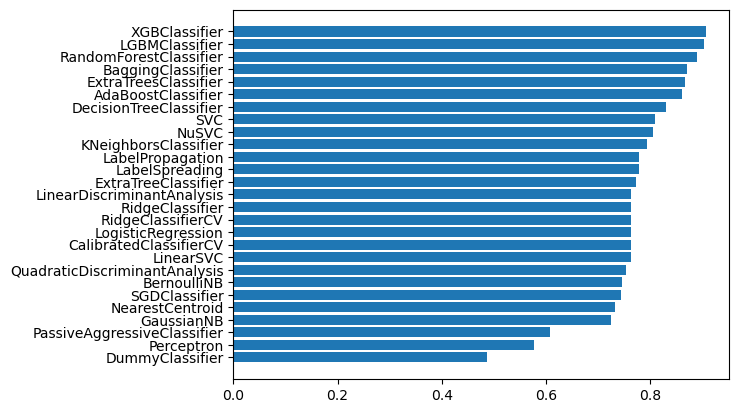

In [6]:
from lazypredict.Supervised import LazyClassifier
clf=LazyClassifier()
models,predict=clf.fit(x_train,x_test,y_train,y_test)

sort=models.sort_values(by="Accuracy" )
plt.barh(sort.index,sort["Accuracy"])
plt.show()

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
predict=xgb.predict(x_test)

acc_score=accuracy_score(y_test,predict)
print(acc_score)

class_report=classification_report(y_test,predict)
print(class_report)

0.9077212806026366
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1633
           1       0.92      0.88      0.90      1553

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



In [8]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)
predict=lgbm.predict(x_test)

acc_score=accuracy_score(y_test,predict)
print(acc_score)

class_report=classification_report(y_test,predict)
print(class_report)

0.9030131826741996
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1633
           1       0.92      0.88      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



In [11]:
#saving the model:
import joblib
joblib.dump(xgb, 'model.joblib')

['model.joblib']